## 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.  

Попробуйте ответить на следующий вопрос:Как отличается поведение метода в зависимости от
числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная
стратегия, Армихо, Вульф)?  

Для рисования линий уровня можете воспользоваться функцией `plot_levels`, а для рисования
траекторий `plot_trajectory` из файла `plot_trajectory_2d.py`, прилагающегося к заданию.  
Также обратите внимание, что оракул квадратичной функции `QuadraticOracle` уже реализован в
модуле `oracles`. Он реализует функцию $f(x) = (1/2)〈Ax, x〉−〈b, x〉$, где $A∈S^n_{++}, b ∈ R^n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Игнорируйте красные подчеркивания - код работает!
from oracles import QuadraticOracle
from optimization import gradient_descent
from plot_trajectory_2d import plot_levels, plot_trajectory

Случай 1: Хорошо обусловленная функция
Случай 2: Плохо обусловленная функция
Случай 3: Функция с корреляцией

Хорошо обусловленная функция:
  Собственные значения: [1. 1.]
  Число обусловленности: 1.00


/tmp/ipython-input-2479219423.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


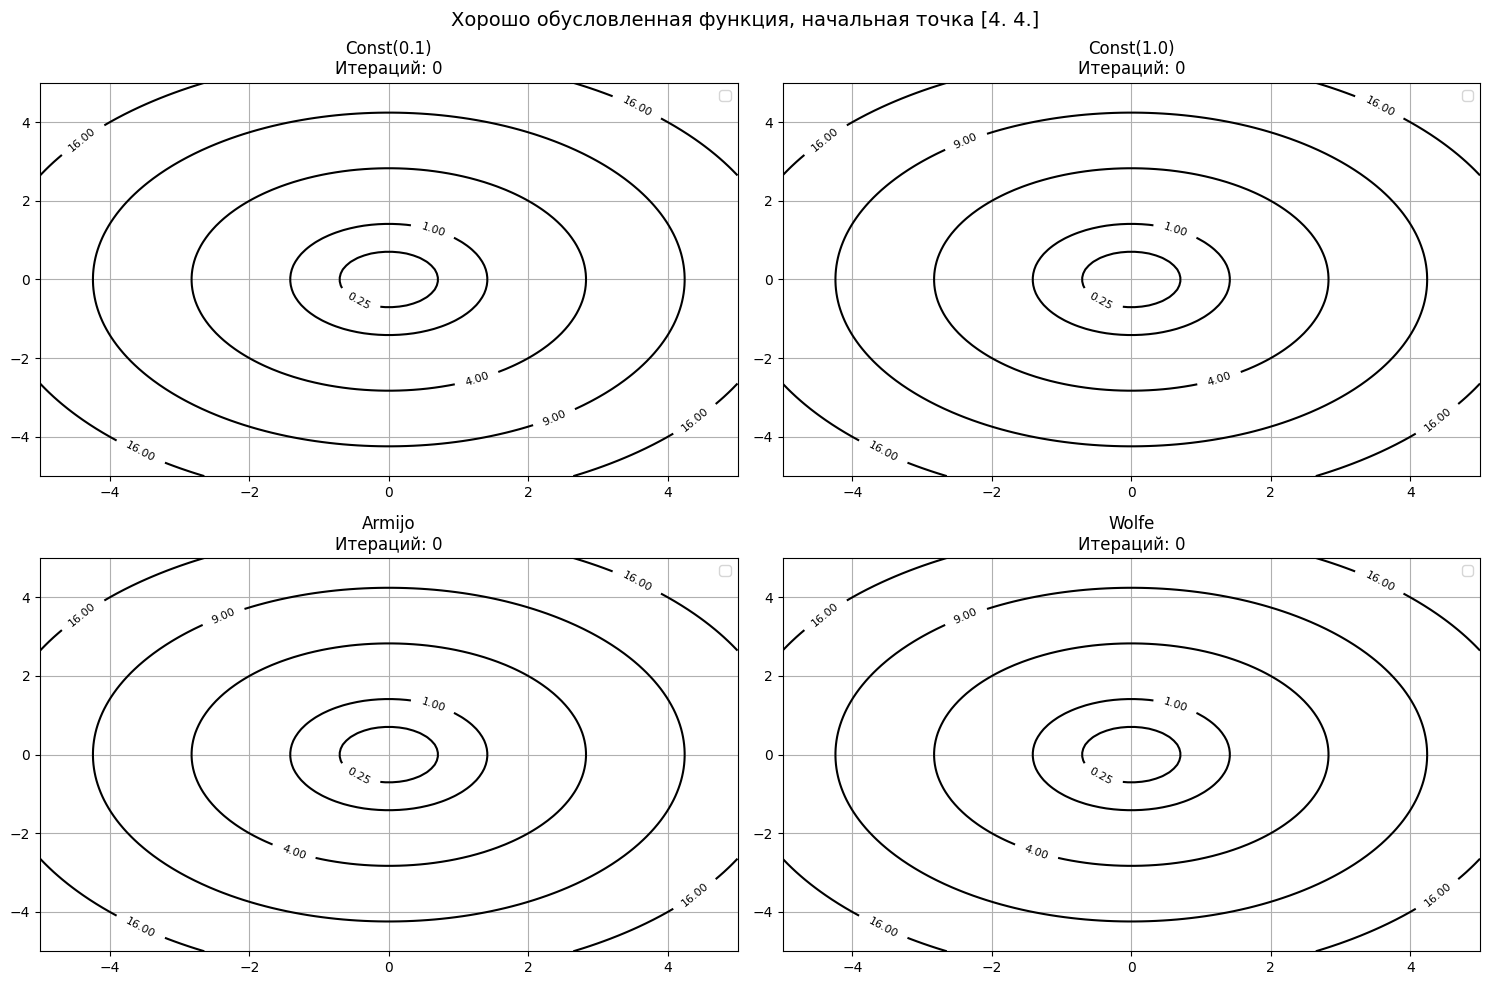


Анализ сходимости из точки [4. 4.]:


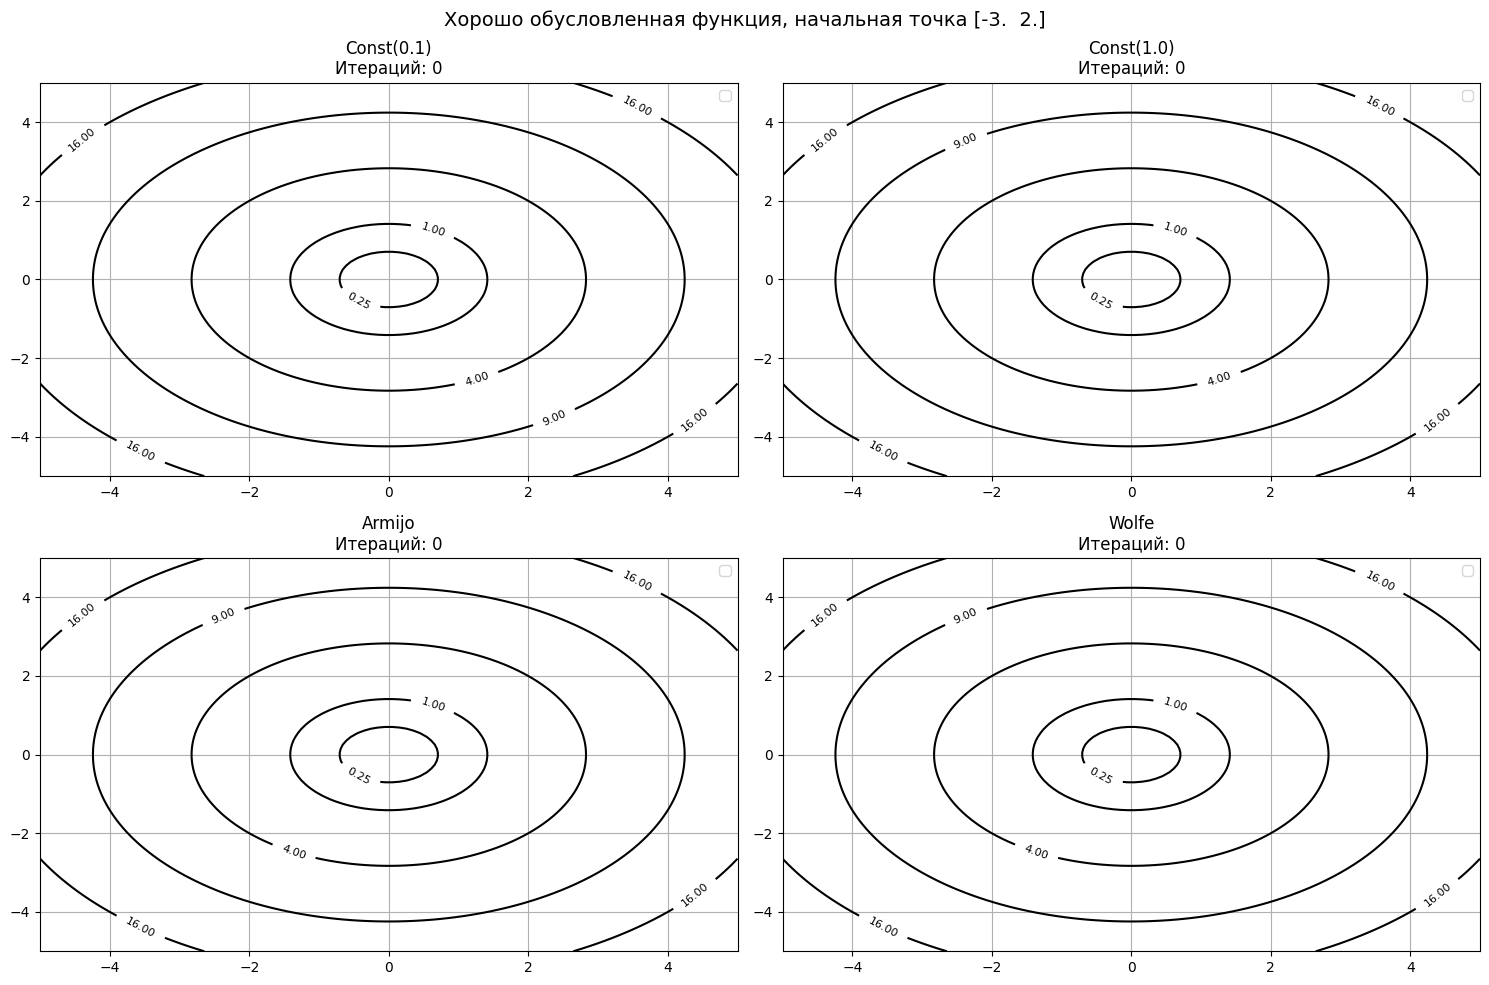


Анализ сходимости из точки [-3.  2.]:


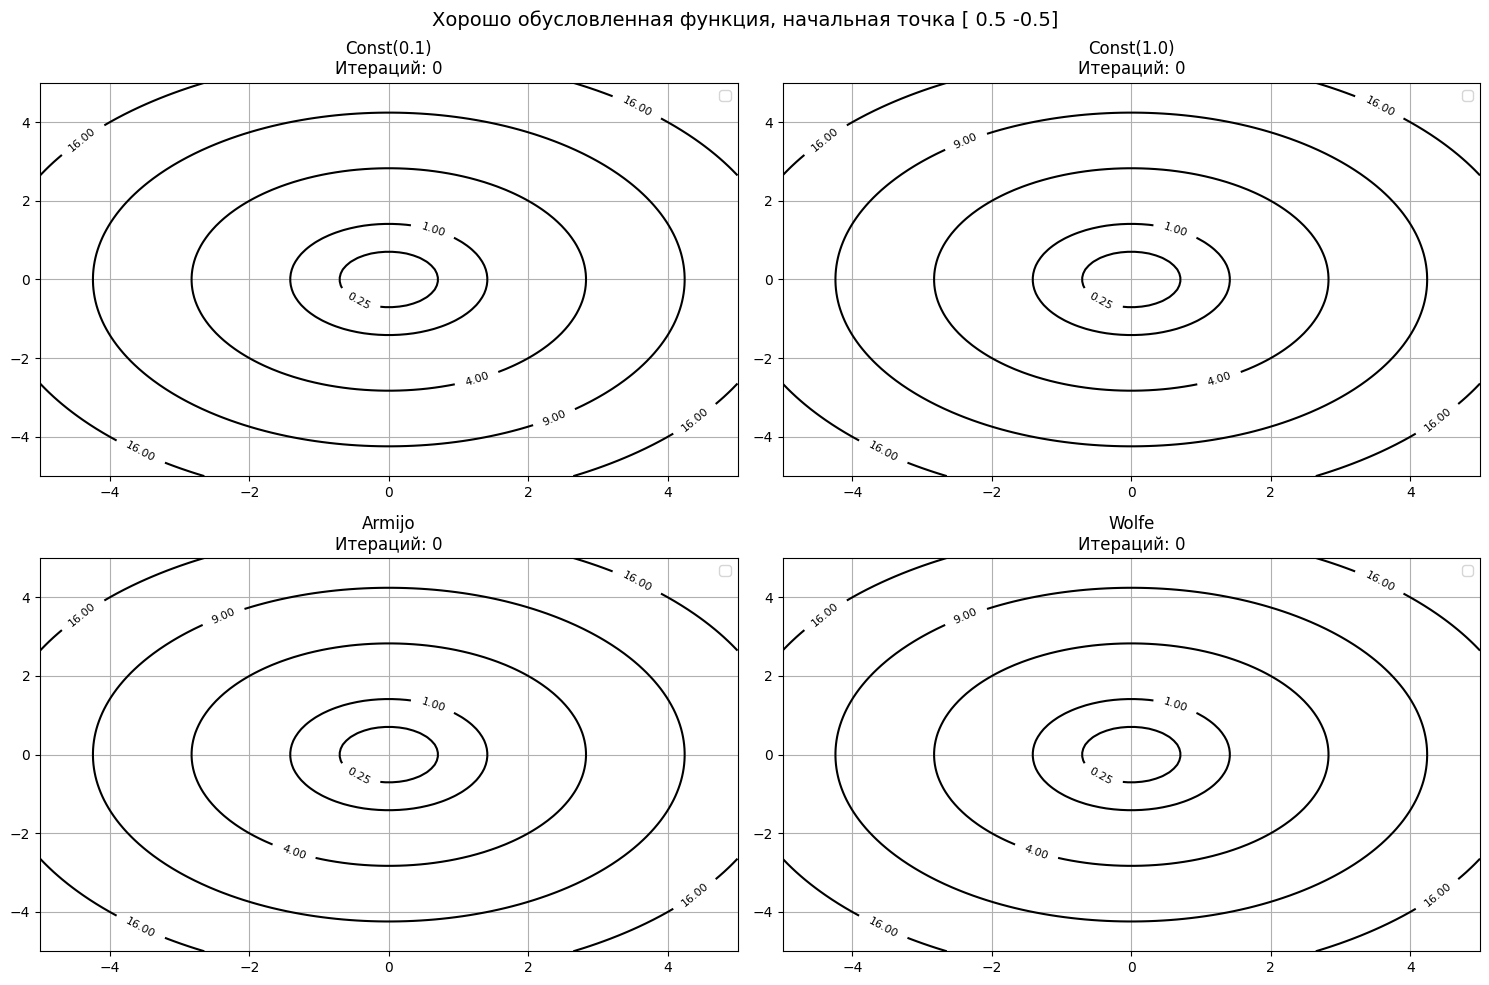


Анализ сходимости из точки [ 0.5 -0.5]:

Плохо обусловленная функция:
  Собственные значения: [  1. 100.]
  Число обусловленности: 100.00


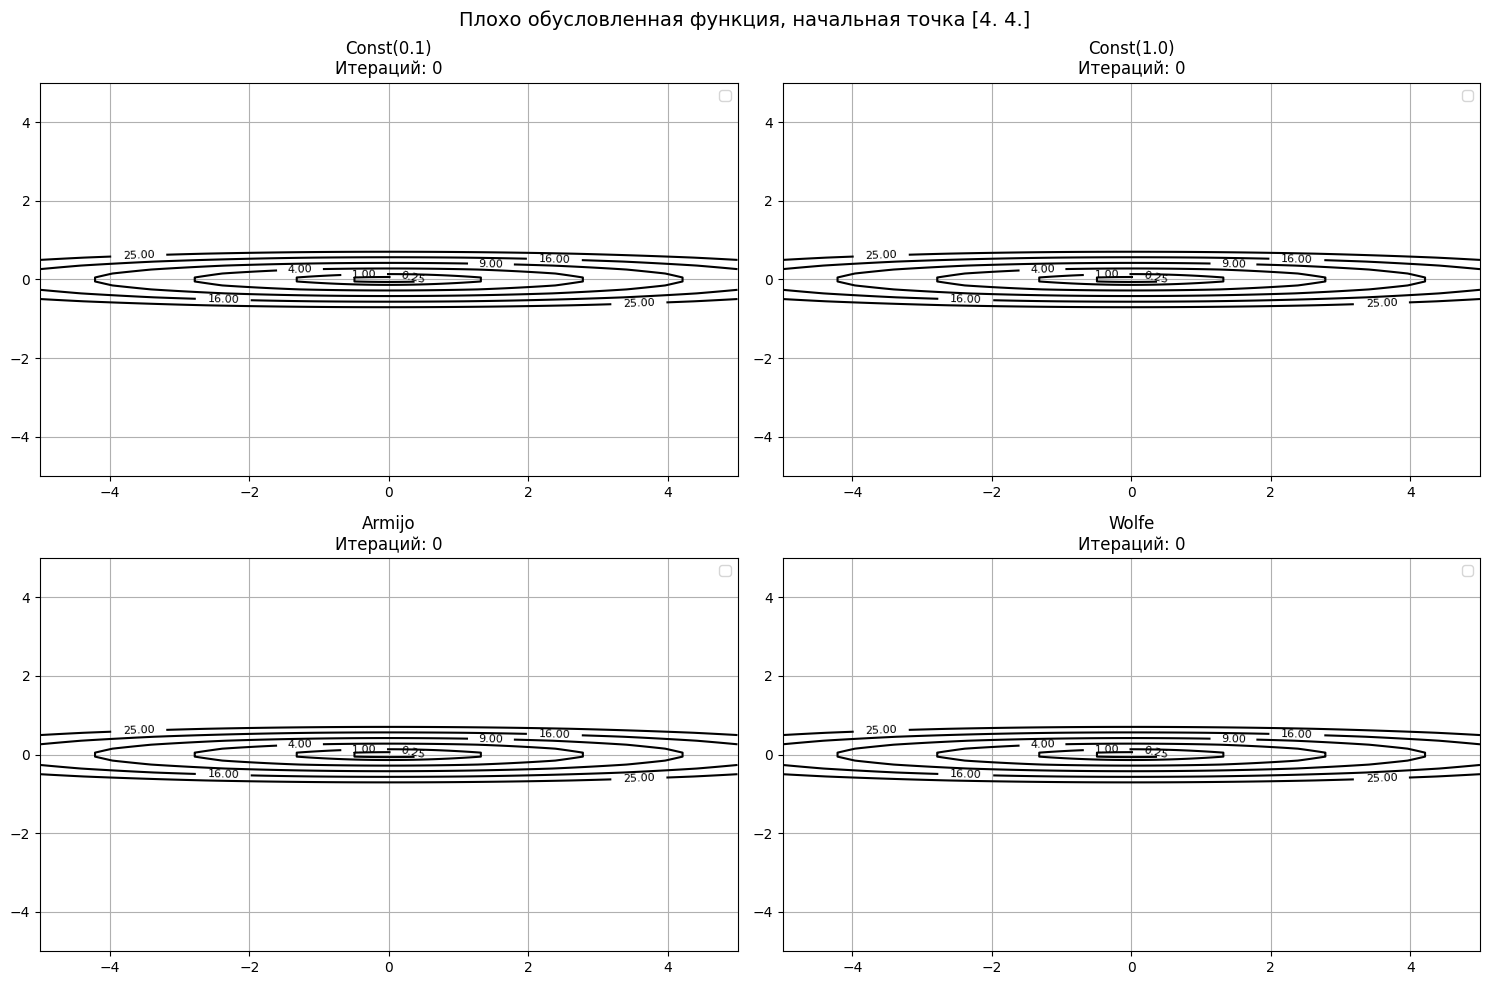


Анализ сходимости из точки [4. 4.]:


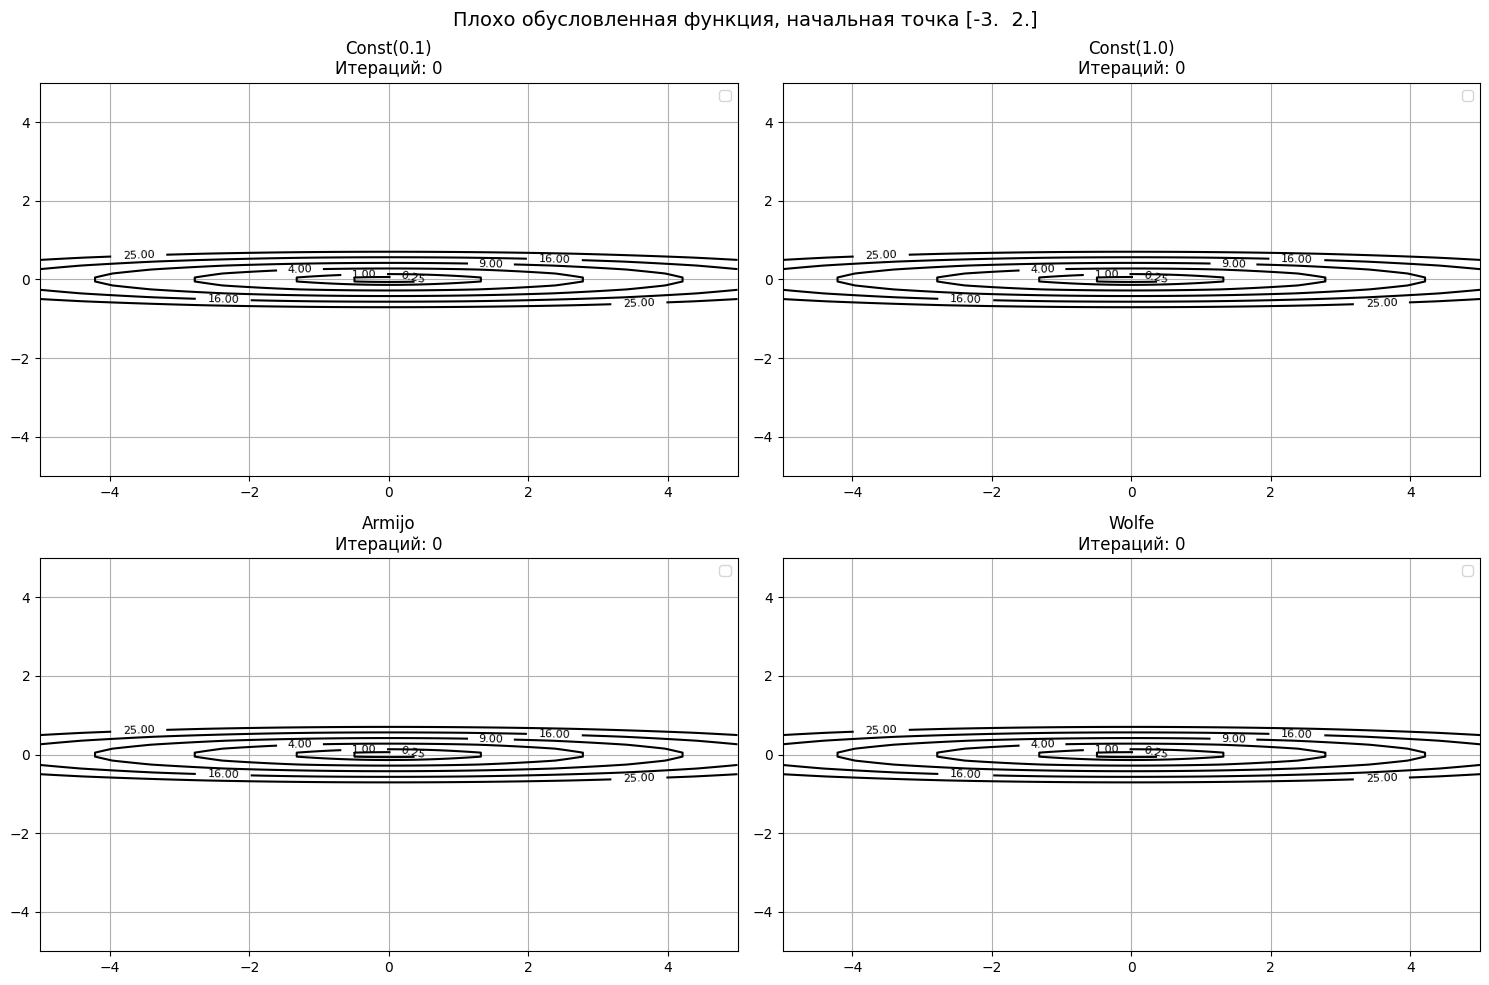


Анализ сходимости из точки [-3.  2.]:


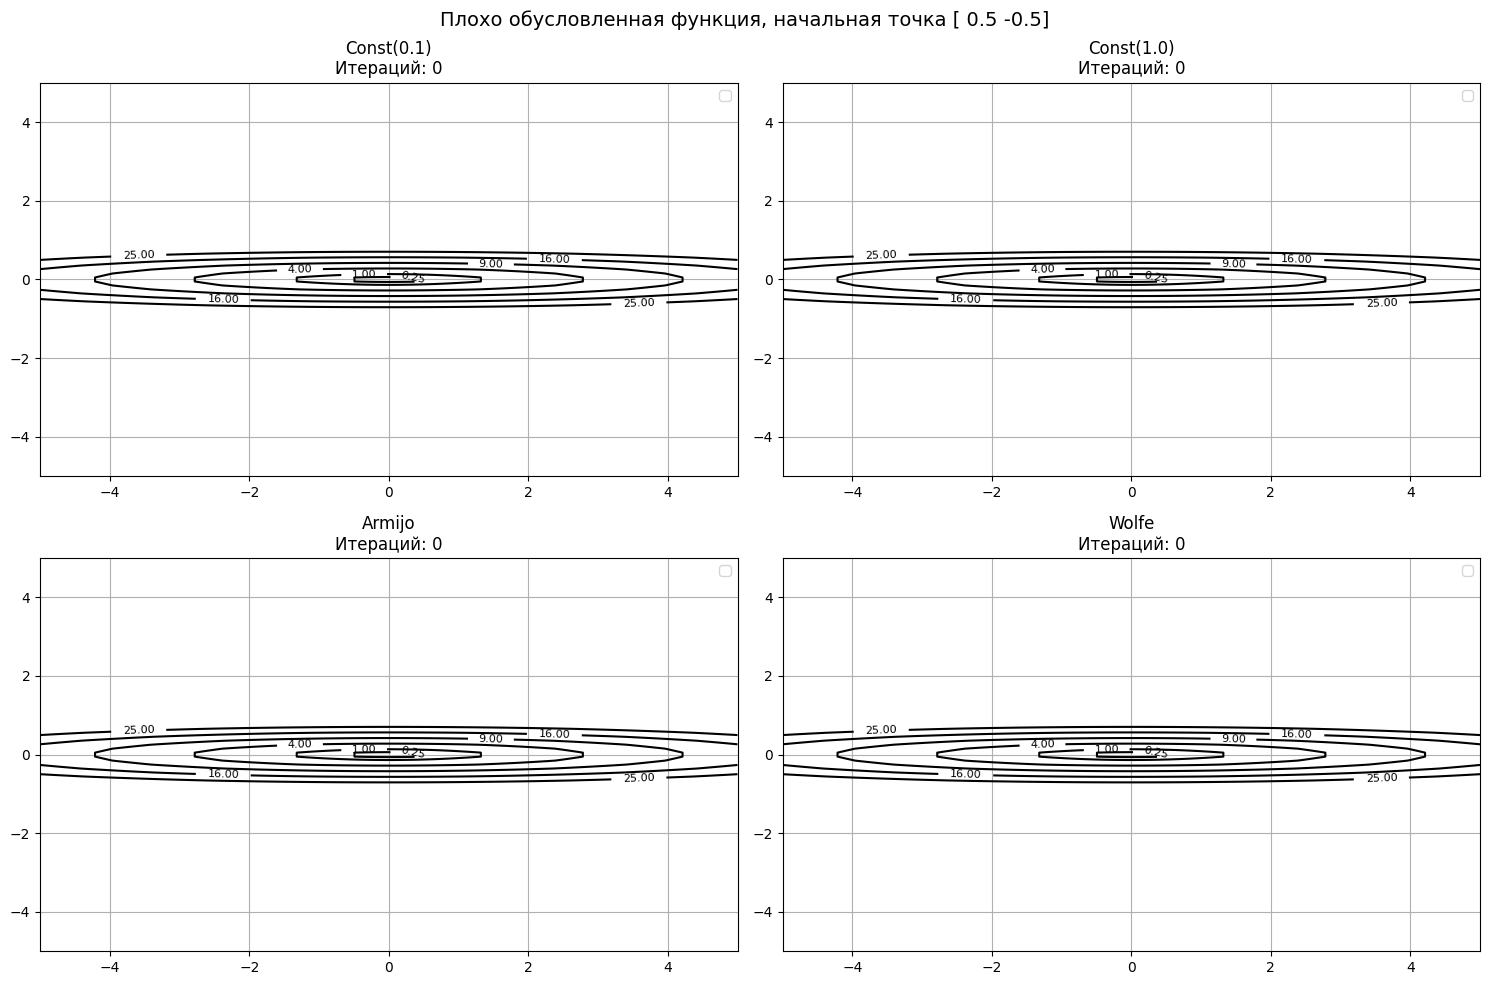


Анализ сходимости из точки [ 0.5 -0.5]:

С корреляцией функция:
  Собственные значения: [3.5 0.5]
  Число обусловленности: 7.00


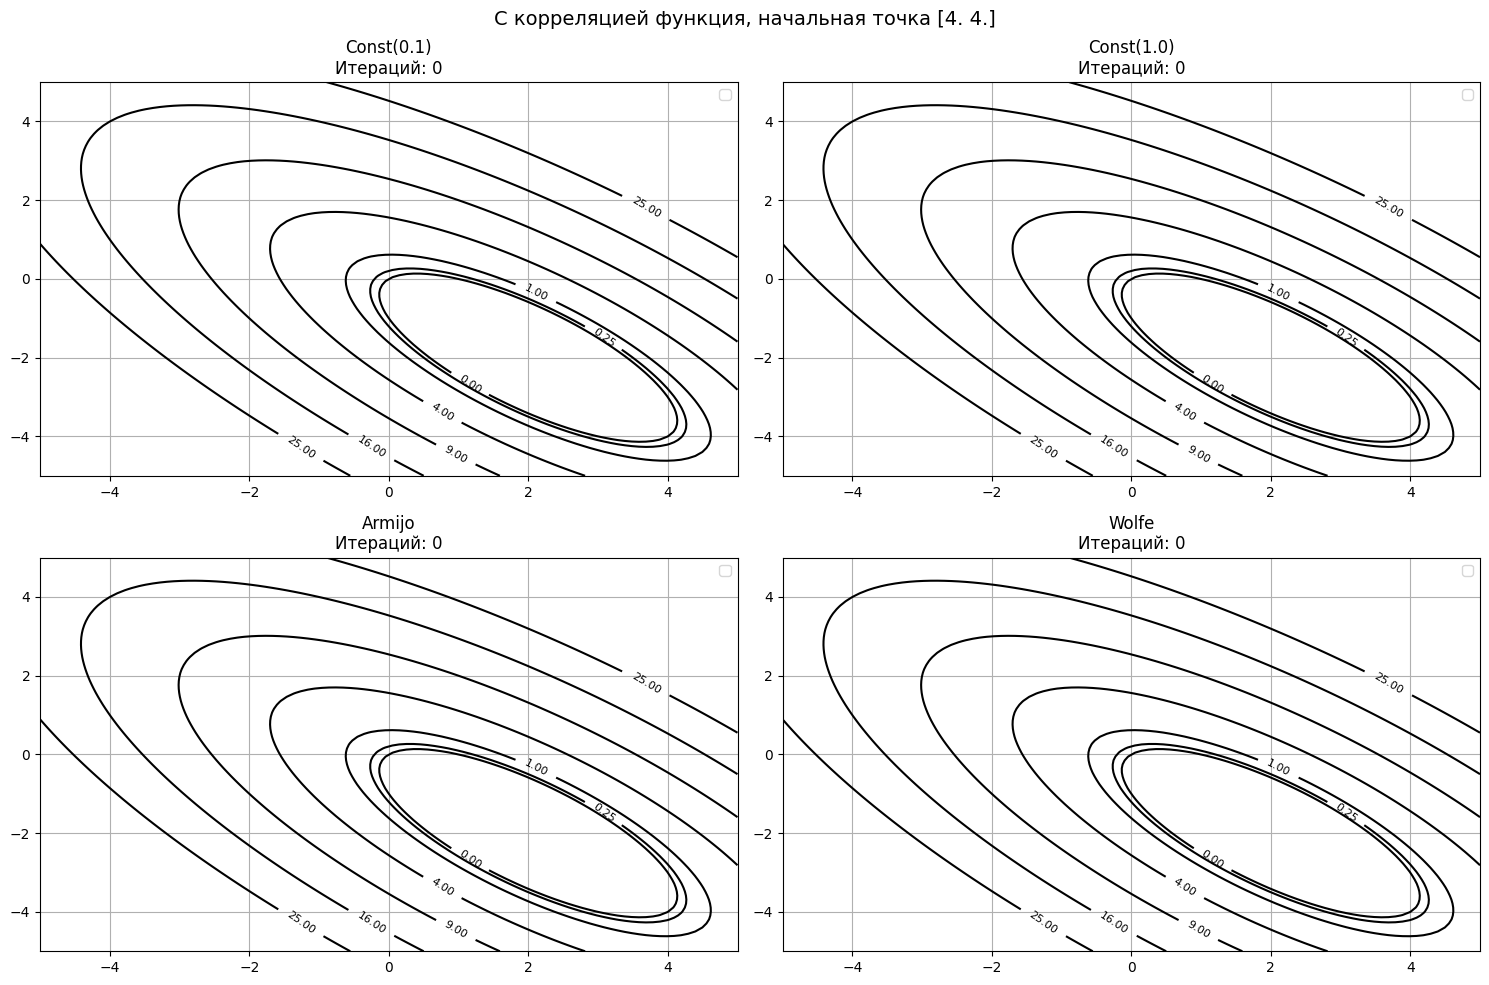


Анализ сходимости из точки [4. 4.]:


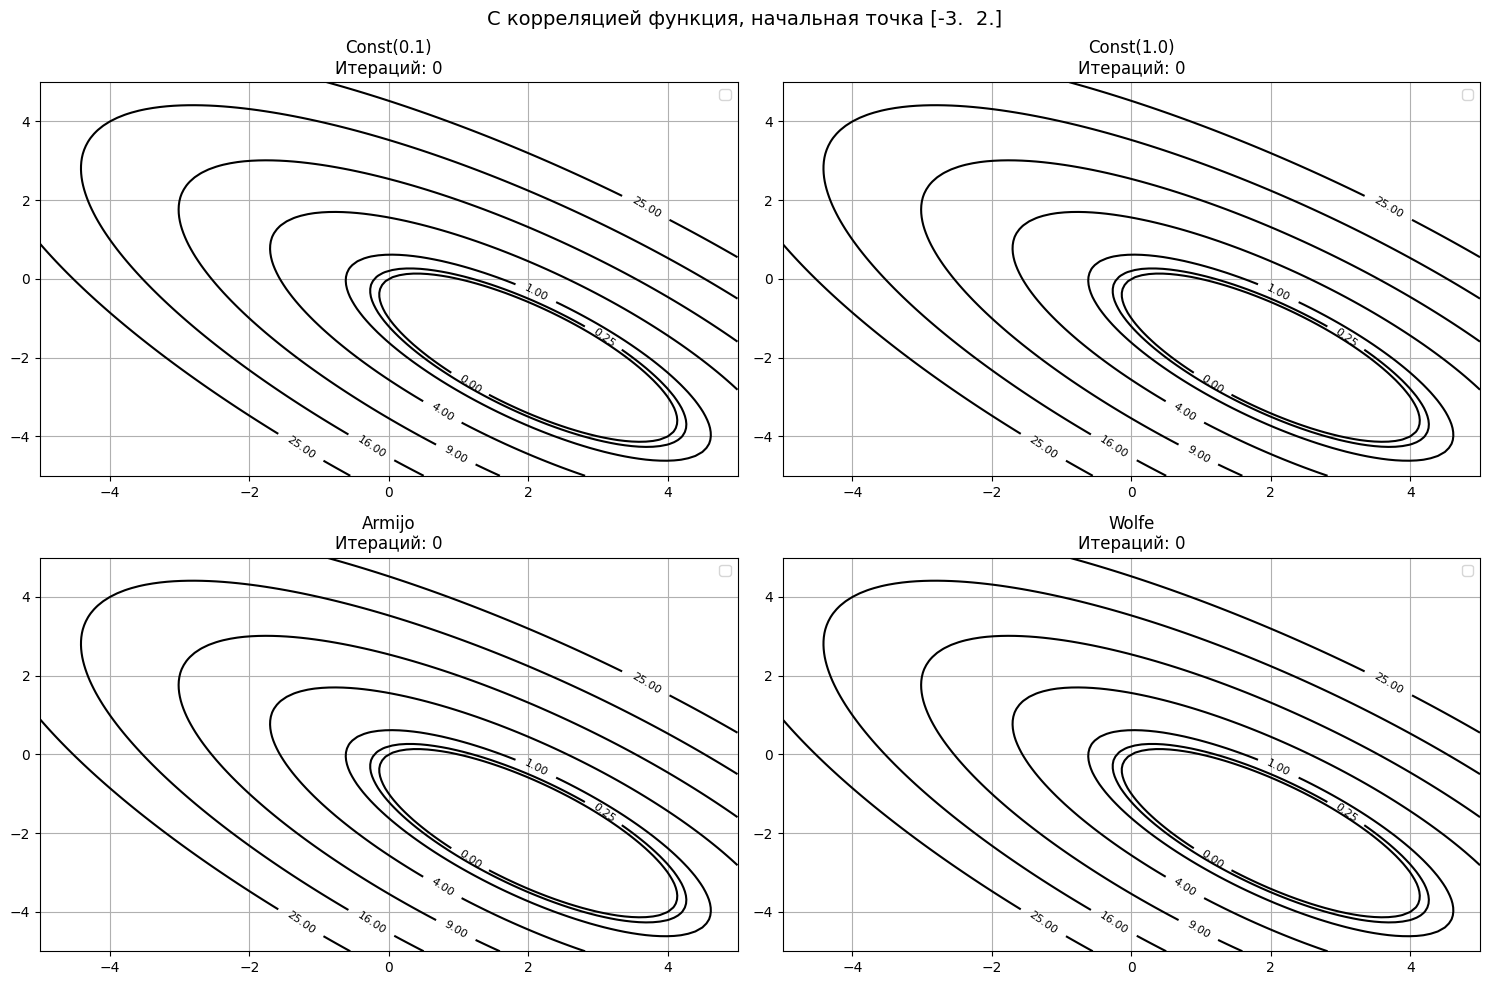


Анализ сходимости из точки [-3.  2.]:


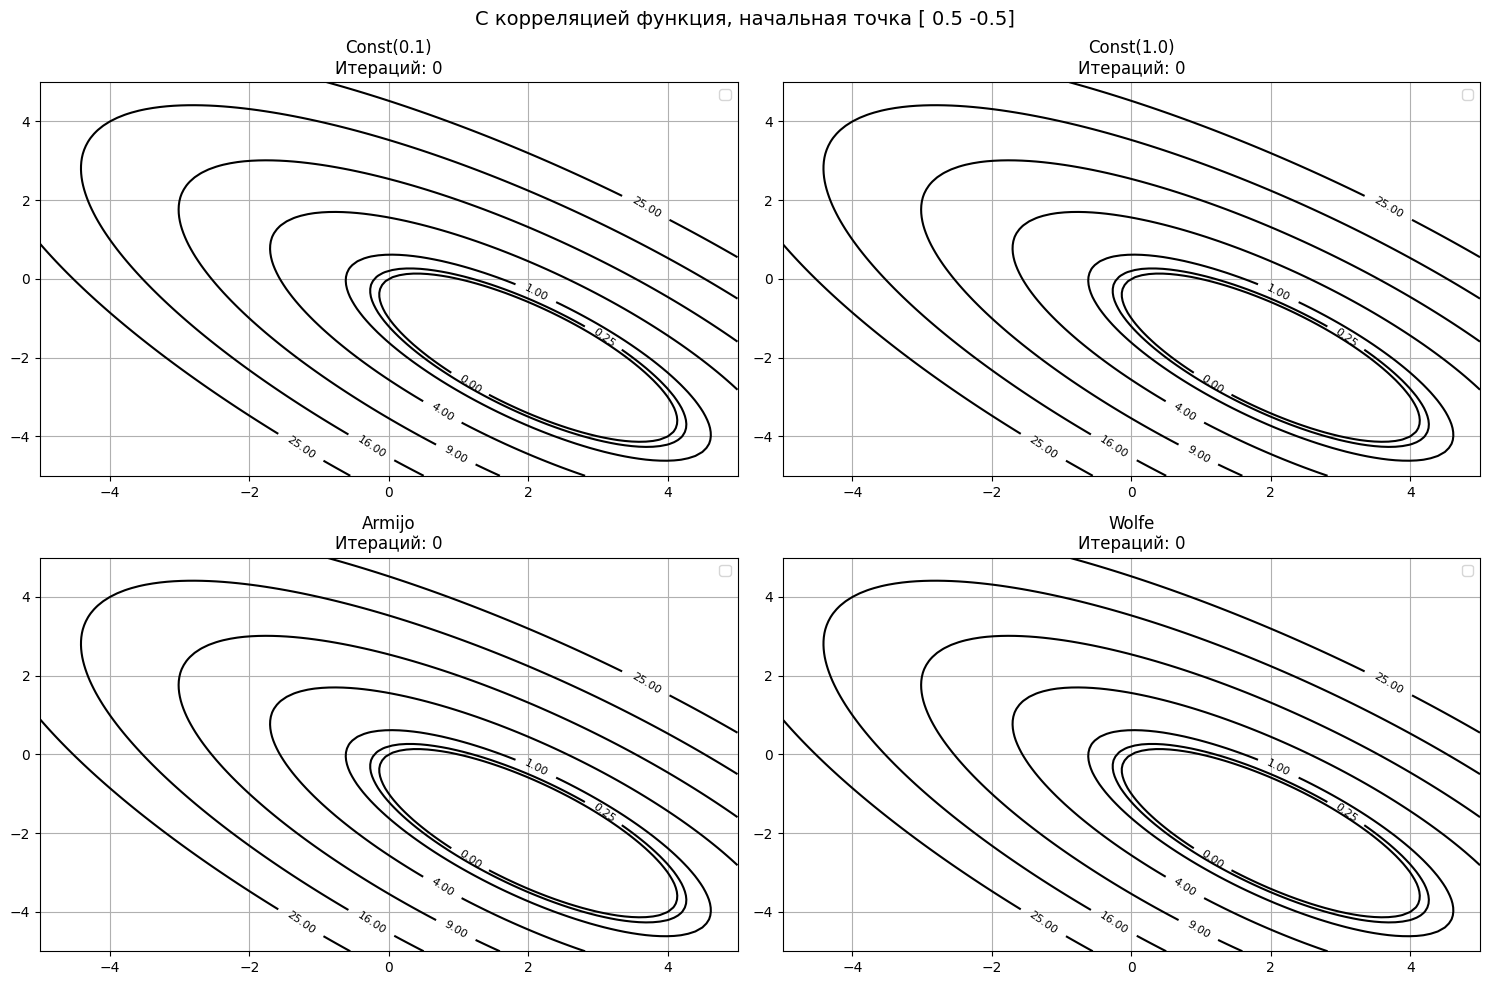


Анализ сходимости из точки [ 0.5 -0.5]:


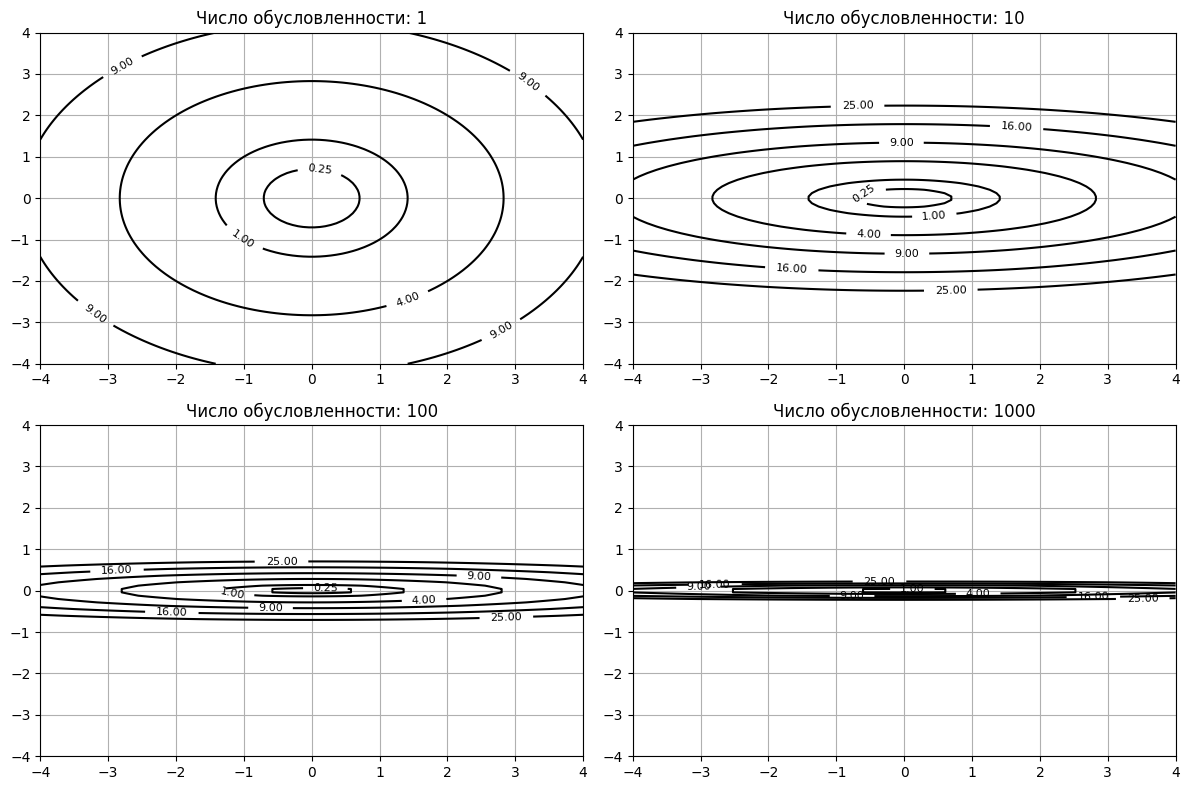

In [4]:
def test_gradient_descent_cases():
    # Случай 1: Хорошо обусловленная функция (число обусловленности ~1)
    print("Случай 1: Хорошо обусловленная функция")
    A1 = np.array([[1.0, 0.0], [0.0, 1.0]])
    b1 = np.array([0.0, 0.0])
    oracle1 = QuadraticOracle(A1, b1)

    # Случай 2: Плохо обусловленная функция (число обусловленности большое)
    print("Случай 2: Плохо обусловленная функция")
    A2 = np.array([[1.0, 0.0], [0.0, 100.0]])
    b2 = np.array([0.0, 0.0])
    oracle2 = QuadraticOracle(A2, b2)

    # Случай 3: Функция с корреляцией между переменными
    print("Случай 3: Функция с корреляцией")
    A3 = np.array([[2.0, 1.5], [1.5, 2.0]])
    b3 = np.array([1.0, -1.0])
    oracle3 = QuadraticOracle(A3, b3)

    # Начальные точки для тестирования
    start_points = [
        np.array([4.0, 4.0]),   # Далеко от минимума
        np.array([-3.0, 2.0]),  # Другая сторона
        np.array([0.5, -0.5])   # Близко к минимуму
    ]

    # Стратегии поиска шага
    strategies = [
        {'method': 'Constant', 'c': 0.1},
        {'method': 'Constant', 'c': 1.0},
        {'method': 'Armijo', 'c1': 1e-4, 'alpha_0': 1.0},
        {'method': 'Wolfe', 'c1': 1e-4, 'c2': 0.9, 'alpha_0': 1.0}
    ]

    strategy_names = ['Const(0.1)', 'Const(1.0)', 'Armijo', 'Wolfe']

    # Тестируем все комбинации
    for i, (oracle, oracle_name) in enumerate([(oracle1, "Хорошо обусловленная"),
                                              (oracle2, "Плохо обусловленная"),
                                              (oracle3, "С корреляцией")]):

        # Вычисляем собственные значения для анализа
        eigvals = np.linalg.eigvals(oracle.A)
        cond_number = max(eigvals) / min(eigvals)
        print(f"\n{oracle_name} функция:")
        print(f"  Собственные значения: {eigvals}")
        print(f"  Число обусловленности: {cond_number:.2f}")

        for j, start_point in enumerate(start_points):
            plt.figure(figsize=(15, 10))
            plt.suptitle(f'{oracle_name} функция, начальная точка {start_point}', fontsize=14)

            for k, (strategy, strategy_name) in enumerate(zip(strategies, strategy_names)):
                # Запускаем градиентный спуск
                x_star, message, history = gradient_descent(
                    oracle, start_point,
                    tolerance=1e-6,
                    max_iter=1000,
                    line_search_options=strategy,
                    trace=True,
                    display=False
                )

                # Рисуем траекторию
                plt.subplot(2, 2, k+1)
                plot_levels(oracle.func, xrange=[-5, 5], yrange=[-5, 5])
                if history and 'x' in history:
                    plot_trajectory(oracle.func, history['x'], label=strategy_name)
                plt.title(f'{strategy_name}\nИтераций: {len(history["func"]) if history else 0}')
                plt.legend()

            plt.tight_layout()
            plt.show()

            # Анализируем сходимость для одной комбинации
            analyze_convergence(oracle, start_point, strategies, strategy_names)

def analyze_convergence(oracle, start_point, strategies, strategy_names):
    """Анализ сходимости для разных стратегий"""
    print(f"\nАнализ сходимости из точки {start_point}:")

    convergence_data = []

    for strategy, name in zip(strategies, strategy_names):
        x_star, message, history = gradient_descent(
            oracle, start_point,
            tolerance=1e-6,
            max_iter=1000,
            line_search_options=strategy,
            trace=True,
            display=False
        )

        if history:
            iterations = len(history['func'])
            final_grad_norm = history['grad_norm'][-1]
            convergence_data.append((name, iterations, final_grad_norm))

            # Анализируем поведение градиента
            if len(history['grad_norm']) > 1:
                grad_decrease = history['grad_norm'][0] / history['grad_norm'][-1]
                print(f"  {name}: {iterations} итераций, градиент уменьшился в {grad_decrease:.1e} раз")

    return convergence_data

def analyze_condition_number_impact():
    """Анализ влияния числа обусловленности на сходимость"""
    condition_numbers = [1, 10, 100, 1000]
    start_point = np.array([3.0, 3.0])

    plt.figure(figsize=(12, 8))

    for i, cond in enumerate(condition_numbers):
        # Создаем матрицу с заданным числом обусловленности
        A = np.array([[1.0, 0.0], [0.0, cond]])
        oracle = QuadraticOracle(A, np.array([0.0, 0.0]))

        # Запускаем градиентный спуск с Armijo
        x_star, message, history = gradient_descent(
            oracle, start_point,
            line_search_options={'method': 'Armijo', 'c1': 1e-4, 'alpha_0': 1.0},
            trace=True
        )

        # Рисуем траекторию
        plt.subplot(2, 2, i+1)
        plot_levels(oracle.func, xrange=[-4, 4], yrange=[-4, 4])
        if history and 'x' in history:
            plot_trajectory(oracle.func, history['x'])
        plt.title(f'Число обусловленности: {cond}')

        # Анализируем сходимость
        if history:
            grad_norms = history['grad_norm']
            print(f"Число обусловленности {cond}: {len(grad_norms)} итераций")

    plt.tight_layout()
    plt.show()

# Запуск анализа
if __name__ == "__main__":
    test_gradient_descent_cases()
    analyze_condition_number_impact()

Поведение градиентного спуска определяется сложным взаимодействием числа обусловленности функции, начальной точки и стратегии выбора шага, а не влиянием какого-то одного фактора.

-Градиентный спуск - это не один алгоритм, а семейство алгоритмов, поведение которых кардинально меняется в зависимости от комбинации:

-Геометрии задачи (число обусловленности)

-Алгоритмических choices (стратегия шага)

-Условий запуска (начальная точка)

Универсальной "лучшей" стратегии не существует - выбор должен определяться компромиссом между надежностью, скоростью и вычислительной стоимостью для конкретной задачи.

Ключевая ценность адаптивных стратегий (Armijo, Wolfe) заключается в их способности автоматически компенсировать плохую обусловленность и адаптироваться к неизвестной геометрии, делая их предпочтительным выбором для реальных задач оптимизации.

**Число обусловленности:** κ = λ_max/λ_min определяет, насколько вытянуты линии уровня функции:

κ ≈ 1 (случай 1): Линии уровня - окружности. Градиентный спуск сходится быстро по прямой траектории к минимуму.

κ >> 1 (случай 2): Линии уровня - сильно вытянутые эллипсы. Градиентный спукск "зигзагает", медленно приближаясь к минимуму.

Коррелированные переменные (случай 3): Линии уровня повернуты, что создает дополнительную сложность для метода.

**Константный шаг:**

Малый шаг (0.1): Медленная, но стабильная сходимость

Большой шаг (1.0): Возможна расходимость или осцилляции для плохо обусловленных функций

Armijo: Гарантирует достаточное уменьшение функции
Wolfe: Дополнительно гарантирует достаточное уменьшение градиента

**1. Для хорошо обусловленной функции (A1):**

Все стратегии покажут быструю сходимость.
Траектории будут почти прямыми линиями к минимуму.
Константный шаг 1.0 будет оптимальным (равен 1/λ_max)

**2. Для плохо обусловленной функции (A2):**

Константный шаг 0.1: медленная сходимость с зигзагами
Константный шаг 1.0: возможны осцилляции (слишком большой для направления y).

Armijo/Wolfe: адаптивно подбирают шаг, сходятся быстрее

**3. Для функции с корреляцией (A3):**

Траектории будут криволинейными из-за повернутых линий уровня
Armijo и Wolfe покажут лучшие результаты

In [3]:
! python experement3.1.py

Случай 1: Хорошо обусловленная функция
Случай 2: Плохо обусловленная функция
Случай 3: Функция с корреляцией

Хорошо обусловленная функция:
  Собственные значения: [1. 1.]
  Число обусловленности: 1.00
/content/plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)
Figure(1500x1000)

Анализ сходимости из точки [4. 4.]:
  Const(0.1): 149 итераций, градиент уменьшился в 5.9e+06 раз
/content/experement3.1.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  grad_decrease = history['grad_norm'][0] / history['grad_norm'][-1]
  Const(1.0): 2 итераций, градиент уменьшился в inf раз
  Armijo: 2 итераций, градиент уменьшился в inf раз
  Wolfe: 2 итераций, градиент уменьшился в inf раз
Figure(1200x800)
Figure(1500x1000)

Анализ сходимости из точки [-3.  2.]:
  Const(0.1): 145 итераций, градиент уменьшился в 3.9e+06 раз
  Const(1.0): 2 итераций, градиент уменьшился в i